Procesamiento Digital de Imágenes Satelitales
# Redes Neuronales

In [1]:
#Importamos bibliotecas básicas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')
plt.style.use('fivethirtyeight')

![Redes Neuronales](images/redes_neuronales.png)

**¿Qué es una neurona biológica?**

Imaginemos por un momento el cerebro humano como una gran red de comunicación. 
Esa red está formada por millones de pequeñas unidades llamadas neuronas. 
Una neurona es una célula especializada en recibir, procesar y transmitir información a otras neuronas,
músculos o glándulas.

Cada neurona tiene tres partes principales:

- Dendritas, que actúan como pequeñas antenas que reciben señales de otras neuronas.

- Cuerpo celular o soma, donde se integra toda esa información recibida.

- Axón, un largo cable que transporta el mensaje procesado hacia otras neuronas.

Cuando una señal llega a la neurona, si es lo suficientemente fuerte, se genera una especie de "pulso eléctrico" llamado potencial de acción, que viaja por el axón hasta llegar al final, donde se comunica con otras neuronas a través de una conexión llamada sinapsis.

Así, miles de millones de señales fluyen cada segundo en nuestro cerebro, permitiéndonos desde respirar hasta resolver un problema matemático.

Em sintésis, una neurona biológica recibe información, decide si debe transmitirla o no, y luego la pasa a la siguiente neurona. Esta idea tan simple inspiró el modelo de neuronas artificiales en la inteligencia artificial.

![Neurona](images/neurona.png)

**¿Y cómo se inspira una máquina en una neurona?**

Al ver cómo trabaja una neurona biológica —recibiendo información, procesándola y transmitiéndola si corresponde—, los científicos pensaron: ¿y si hacemos algo parecido en una computadora?

Así nació la idea de la neurona artificial, que no es una célula, sino una función matemática. Su trabajo es muy similar al de la neurona biológica:

- Recibe datos de entrada, que pueden ser números, como características de una imagen o los valores de un sensor.

- Pondera esos datos, es decir, les da diferente importancia usando unos números llamados pesos.

- Suma todo y le aplica una función, como si fuera una decisión: ¿la señal total es suficientemente fuerte?

- Genera una salida, que puede ser, por ejemplo, una predicción o una clasificación.

Este modelo básico se llama perceptrón, y fue propuesto en 1958 por Frank Rosenblatt. Es la versión más simple de una neurona artificial.

Podríamos decir que el perceptrón “decide” en base a una fórmula matemática si una entrada pertenece a una clase u otra. Por ejemplo: si el clima está nublado y la humedad es alta, ¿salgo con paraguas o no?

## Perceptrón Simple

 - Propuesto por Dr Frank Rosenblatt en 1958
 - El objetivo es encontrar un hiperplano de separación
   - Sólo encuentra la solución si los datos son linealmente separables
 - Es un algoritmo online (procesa un ejemplo a la vez), ajustando los parámetros poco a poco
 
 <img align="left" src="images/perceptron.png" alt="Perceptron" width="1200" style="padding-left:300px">

 

**Un ejemplo simple: la puerta lógica AND**

Para entender cómo funciona un perceptrón, pensemos en un problema muy simple: la puerta lógica AND.

En lógica, una puerta AND recibe dos valores de entrada —por ejemplo, verdadero o falso— y solo responde “verdadero” si ambos son verdaderos. Si al menos uno es falso, responde falso.

Podemos escribirlo así:

    True AND True → True

    True AND False → False

    False AND True → False

    False AND False → False

Ahora imaginemos que usamos un perceptrón para aprender esta regla. Le damos como entrada los pares de valores (por ejemplo, codificados como 1 y -1) y le pedimos que aprenda cuándo debe dar como resultado un 1 (verdadero) o un -1 (falso).

Lo interesante es que el perceptrón puede aprender esto perfectamente, porque los datos se pueden separar con una simple línea recta en un plano. Eso es lo que se llama un problema linealmente separable.

### *Ejemplo de problema lineal:* puerta lógica AND

```Python
    True  AND True  = True
    True  AND False = False
    False AND True  = False
    False AND False = False
```

Una representación del conjunto de datos podría ser la siguiente

In [2]:
#Tomando True = 1 y False = -1
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]) #Feature matrix shape(4,2)
y = np.array([1, -1, -1, -1]) #Labels

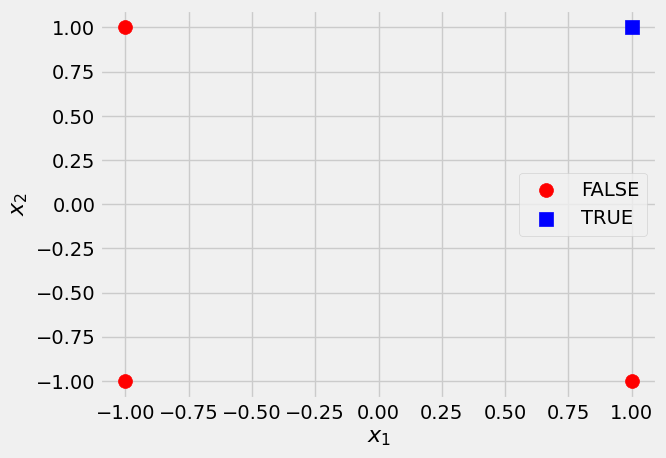

In [3]:
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', marker='o', label='FALSE', s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', marker='s', label='TRUE', s=100)
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.legend();

Pero… ¿qué pasa si el problema no se puede resolver con una sola línea?

Un buen contraejemplo es la puerta lógica XOR. Esta dice que la salida es verdadera solo si las entradas son diferentes. O sea:

    True XOR True → False

    True XOR False → True

    False XOR True → True

    False XOR False → False

Este problema no puede resolverse con un solo perceptrón, porque los datos no pueden separarse con una única línea recta. Para resolverlo, hace falta algo más complejo: una red de neuronas artificiales, lo que llamamos un perceptrón multicapa.

Entonces, así como en el cerebro no todo se resuelve con una sola neurona, en inteligencia artificial tampoco. A veces, necesitamos una red de neuronas artificiales que trabajen juntas para aprender problemas más difíciles.

### Ejemplo no aplicable - Puerta XOR 

![XOR](images/xor.png)

```Python
    True  AND True  = False
    True  AND False = True
    False AND True  = True
    False AND False = False
```

La función XOR no puede ser *aprendida* por un único perceptrón puesto que requiere al menos de dos líneas para separar las clases (-1 y 1). Debe utilizarse al menos una capa adicional de perceptrones para permitir su aprendizaje. A o B pero no ambos.

Una representación del conjunto de datos podría ser la siguiente

In [4]:
X_xor = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_xor = np.array([-1, 1, 1, -1])

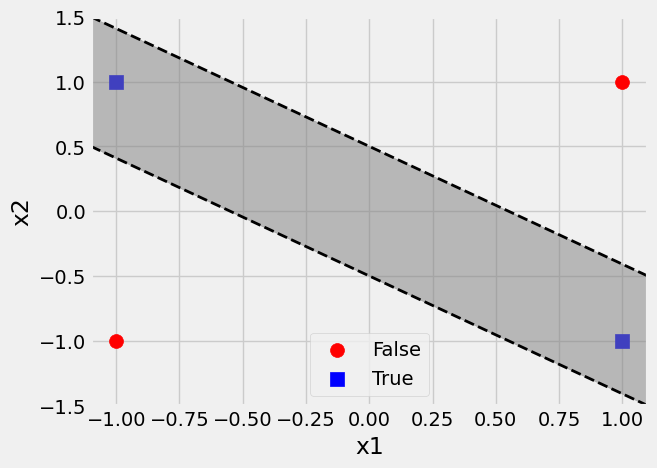

In [5]:
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='red', marker='o', label='False', s=100)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='blue', marker='s', label='True', s=100)
plt.plot([-1.1, 1.1], [1.5, -0.5], color='black', ls='--', lw=2)
plt.plot([-1.1, 1.1], [0.5, -1.5], color='black', ls='--', lw=2)
plt.fill_between([-1.1, 1.1], [1.5, -0.5], [0.5,-1.5],color='gray', alpha=0.5)

plt.xlim(-1.1,1.1); plt.ylim(-1.5,1.5)
plt.xlabel('x1'); plt.ylabel('x2')
plt.legend()

## Algoritmo del Perceptrón

### Datos de entrada
 - Conjunto de datos de entrenamiento $\{{\bf X}_i, y_i\}$, $i=1..n$ con $y_i \in \{1,-1\} $ (i.e. clasificación binaria)

### Hyperparámetros
 - Tasa de aprendizaje ($\alpha$)

Este algoritmo tiene un único hyper-parámetro el cual es la tasa de aprendizaje, es decir, la velocidad con la que se van a ir actualizando los pesos durante el entrenamiento. Los pesos $\omega$ son los parámetros que el modelo debe aprender a partir de los datos.

### Entrenamiento
 - Inicializar los pesos ${\bf \omega}^{(0)} \in \Bbb{R}^n$ 
 - Para cada ejemplo $\{ {\bf X}_i, y_i\}$
   - Predecir $ \hat{y}_i = \mathrm{sign}\left( {\bf X}_i \cdot {\bf \omega} + \omega_0 \right)$ \
     (la función de activación es un escalón)
   - Si $ \hat{y}_i \neq y_i$
       - $\omega^{k+1} = \omega^{k} + \alpha \left( \left( y_i - \hat{y}_i \right) \cdot{\bf X}_i \right)$ \
         donde $\alpha$ es la tasa de aprendizaje

<img align="right" src="images/perceptron.png" alt="Perceptron" width="600">

Actualiza solo cuando se comete un error  

**Error en positivos**: $\omega^{k+1} = \omega^{k} + \alpha {\bf X}_i$
    
**Error en negativos**: $\omega^{k+1} = \omega^{k} - \alpha {\bf X}_i$


Notar que el algoritmo comienza con pesos aleatorios, hace una predicción y, si se equivoca, ajusta los pesos: 
 
 - Si predijo por debajo, suma un "poquito"
 - Si predijo por arriba, resta un "poquito"
 
donde el "poquito" está dado por la tasa de aprendizaje.

El procedimiento se repite hasta que no haya más errores, o hasta que se alcance el número máximo de iteraciones.

## Un poco de código

Definamos las funciones de **Activación** y **Predicción**

La función de activación es una función escalón que devuelve 1 si el argumento es positvo o -1 en caso de que sea negativo.

La función de predicción realiza la suma del producto de las entradas y los pesos, y lo pasa por la función de  activación.

In [6]:
# Por conveniencia redefinimos la matriz de features agregando una columna más al inicio para el sesgo (bias)
X = np.column_stack((np.ones(X.shape[0],dtype=int),X))

**¿Qué es el *bias* en una neurona o perceptrón?**

El bias es un valor adicional que se suma al resultado de la combinación lineal de los pesos y las entradas.
Matemáticamente, si las entradas son x₁, x₂ y los pesos son w₁, w₂, la salida antes de aplicar la función de activación sería:

$ s= w_1 * x_1 +w_2 * x_2 + b $

Donde $b$ es el bias.

**¿Para qué sirve el bias?**

Permite desplazar la frontera de decisión.

Sin bias, la línea de decisión siempre pasaría por el origen (0,0).

El bias actúa como una especie de “offset” que permite mover esa línea hacia arriba, abajo o a los costados.

El bias funciona como un umbral que decide cuándo una neurona se activa o no.

Si no existiera bias:

  - La neurona solo se activaría si la combinación de entradas ponderadas supera exactamente cero.

  - Con bias, podemos desplazar esa frontera, activando la neurona con más flexibilidad.

Así, la red es capaz de representar patrones más complejos.



In [7]:
def activation(s: float) -> int:
    return 1 if s > 0.0 else -1  # función escalón (step), usada en perceptrones clásicos

def predict(X: np.array , w: np.array) -> int:
    s = np.dot(w, X)
    return activation(s)

In [8]:
def activation(s: float) -> int:
    return 1 if s > 0.0 else -1

def predict(X: np.array , w: np.array) -> int:
    s = np.dot(w, X)
    return activation(s)

... y la función de **entrenamiento**

En la función de entrenamiento:
  - Recorremos todos los datos.
  - Hacemos la predicción.
  - Si hay error, ajustamos los pesos.

Esto se repite hasta que ya no hay errores, o hasta que se alcanza un número máximo de iteraciones.

In [9]:
def epoch(X, y, weights, alpha):
    contador_de_errores = 0  # Cuenta cuantos errores se cometieron en cada iteración
    for Xi, yi in zip(X, y):
        yhat = predict(Xi, weights) # Predice el valor de salida
        error = yi - yhat # Esto es igual a cero cuando acierta, 2 o -2 cuando se equiva
        if error != 0: # Si se equivocó, actualiza
            contador_de_errores += 1
            weights += alpha * error * Xi                 
    return weights, contador_de_errores

In [10]:
def fit(X, y, weights=None, alpha=0.1, max_iter=100, verbose=True):
    # Inicializamos los pesos si es que no fueron dados como entrada
    w = weights.copy() if weights.all() else np.random.rand(X.shape[1])
    
    N = 0
    while N < max_iter:      
        
        w, contador = epoch(X, y, w, alpha)
        if verbose:
            print(f"Iteración {N:03d}: Cantidad de errores restantes: {contador}")
        
        if contador == 0:
            break
        N += 1

    if verbose:
        print(f"\nFinalizó entrenamiento: N. de iteraciones: {N} - Cant. de errores restantes: {contador}\n")
    
    return w

## Entrenemos el Percetrón

Como primer paso, fijamos la tasa de aprendizaje e inicializamos los pesos con un generador de números aleatorios.

Realizamos una primera predicción del modelo sin entrenar (i.e. con estos pesos aleatorios) y observamos la respuesta. Como es de esperarse, el modelo se equivoca en la predicción, es decir, el hyper-plano no separa los datos. 

In [11]:
np.random.seed(42)
w = np.random.rand(X.shape[1]) # inicialización aleatoria de pesos

for Xi, yi in zip(X,y):
    yhat = predict(Xi,w)
    print(f"({Xi[0]:2d},{Xi[1]:2d}) -> {yhat:2d} (debería ser {yi:2d})")

( 1, 1) ->  1 (debería ser  1)
( 1, 1) ->  1 (debería ser -1)
( 1,-1) ->  1 (debería ser -1)
( 1,-1) -> -1 (debería ser -1)


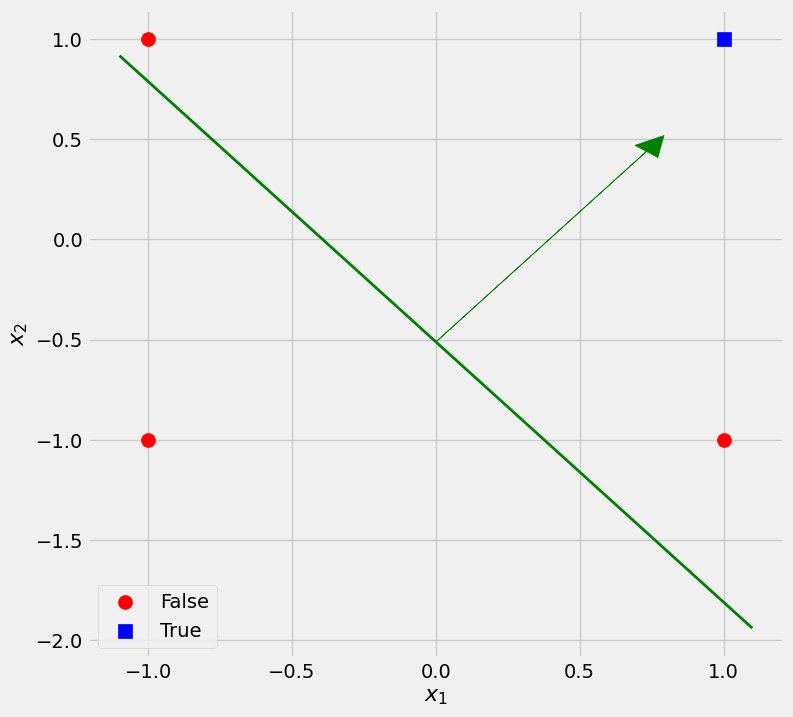

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[y == -1, 1], X[y == -1, 2], c='red', marker='o', label='False', s=100)
plt.scatter(X[y == 1, 1], X[y == 1, 2], c='blue', marker='s', label='True', s=100)

x1 = np.linspace(-1.1,1.1,11); x2 = - w[0]/w[2] - w[1]/w[2] * x1
plt.plot(x1, x2, color='green', lw=2)

plt.arrow(x1[5], x2[5], w[2], w[1], head_width=0.1, head_length=0.1, fc='green', ec='green')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)

plt.legend();

Aquí la linea verde representa el hyper-plano de separación, mientras que la flecha es su normal.
Puede observarse como los datos no son bien separados con los pesos iniciales.

Ahora realizamos el entrenamiento del modelo. La función **fit** nos devolverá los pesos actualizados.

In [13]:
a = 0.01 # tasa de aprendizaje

new_w = fit(X, y, weights=w, alpha=a)

print("Pesos iniciales: ", w) #Pesos iniciales
print("Nuevos pesos: ", new_w) #Pesos luego del entrenamiento

Iteración 000: Cantidad de errores restantes: 2
Iteración 001: Cantidad de errores restantes: 2
Iteración 002: Cantidad de errores restantes: 2
Iteración 003: Cantidad de errores restantes: 2
Iteración 004: Cantidad de errores restantes: 2
Iteración 005: Cantidad de errores restantes: 1
Iteración 006: Cantidad de errores restantes: 1
Iteración 007: Cantidad de errores restantes: 2
Iteración 008: Cantidad de errores restantes: 1
Iteración 009: Cantidad de errores restantes: 1
Iteración 010: Cantidad de errores restantes: 2
Iteración 011: Cantidad de errores restantes: 1
Iteración 012: Cantidad de errores restantes: 1
Iteración 013: Cantidad de errores restantes: 0

Finalizó entrenamiento: N. de iteraciones: 13 - Cant. de errores restantes: 0

Pesos iniciales:  [0.37454012 0.95071431 0.73199394]
Nuevos pesos:  [-0.02545988  0.83071431  0.85199394]


In [14]:
for xi, yi in zip(X,y):
    yhat = predict(xi,new_w)
    print(f"({xi[0]:2d},{xi[1]:2d}) -> {yhat:2d} (debería ser {yi:2d})")

( 1, 1) ->  1 (debería ser  1)
( 1, 1) -> -1 (debería ser -1)
( 1,-1) -> -1 (debería ser -1)
( 1,-1) -> -1 (debería ser -1)


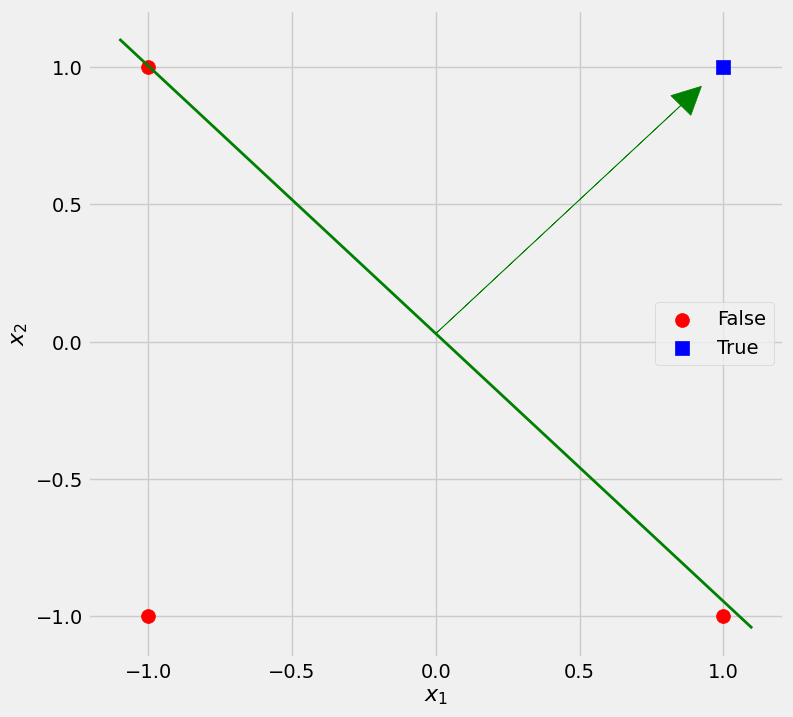

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X[y == -1, 1], X[y == -1, 2], c='red', marker='o', label='False', s=100)
plt.scatter(X[y == 1, 1], X[y == 1, 2], c='blue', marker='s', label='True', s=100)

x1 = np.linspace(-1.1,1.1,11); x2 = -new_w[0]/new_w[2] - new_w[1]/new_w[2] * x1
plt.plot(x1, x2, color='green', lw=2)
plt.arrow(x1[5], x2[5], new_w[2], new_w[1], head_width=0.1, head_length=0.1, fc='green', ec='green')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.legend();

Con los pesos actualizados, trazamos la nueva línea de decisión. Esta línea separa perfectamente los puntos True (cuadrado azul) y False (puntos rojos).

Esto demuestra cómo el Perceptrón, mediante ensayo y error, logra aprender cuál es la frontera adecuada para separar las clases.

## Animación 

In [16]:
def fit(X, y, weights=None, alpha=0.1, max_iter=100, verbose=True):
    # Inicializamos los pesos si es que no fueron dados como entrada
    w = weights.copy() if weights.all() else np.random.rand(X.shape[1])
    
    N = 0
    w_sequence = []
    while N < max_iter:      
        
        w, contador = epoch(X, y, w, alpha)
        if verbose:
            print(f"Iteración {N:03d}: Cantidad de errores restantes: {contador}")
        
        w_sequence.append([*w])
        
        if contador == 0:
            break
        N += 1

    if verbose:
        print(f"\nFinalizó entrenamiento: N. de iteraciones: {N} - Cant. de errores restantes: {contador}\n")
    
    return w, w_sequence

In [17]:
%%capture

fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.scatter(X[y == -1, 1], X[y == -1, 2], c='red', marker='o', label='False', s=100)
plt.scatter(X[y == 1, 1], X[y == 1, 2], c='blue', marker='s', label='True', s=100)

x1 = np.linspace(-1.5, 1.5, 100)
line, = ax.plot([], [], 'g-', lw=2)

np.random.seed(42)
w = np.random.rand(X.shape[1]) # inicialización aleatoria de pesos
a = 0.01

w, w_sequence = fit(X,y,weights=w,alpha=a,verbose=False)

def update(frame):
    global w_sequence
    w = w_sequence[frame]
    if w[2] != 0:  # evitar división por cero
        x2 = -w[0]/w[2] - w[1]/w[2]*x1
        line.set_data(x1, x2)
    return line,

ani = FuncAnimation(fig, update, frames=len(w_sequence), interval=500, repeat=False);

In [18]:
ani

## Neurona artificial



Es una versión generalizada del percetrón la cual permite resolver problemas más complejos y cuyas principales diferencias son:
- Usa funciones de activación continuas como:
    - Sigmoid: $\sigma(x) = \frac{1}{1+e^{-x}}$
    - Tangente hiperbólica: ${\rm tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
    - ReLU (Rectified Linear Unit) ${\rm ReLU}(x) = \max(0,x)$
    
- En consecuencia, la salida de una neurona puede ser una variable continua

- Pueden ser entrenadas mediante el algoritmo de gradiente descendente (*algoritmo de optimización iterativo que se utiliza para minimizar una función*) o *backpropagation*

- Son las unidades de redes neuronales más complejas conocidas como Perceptrón Multi Capa o *MultiLayer Perceptron* (MLP)

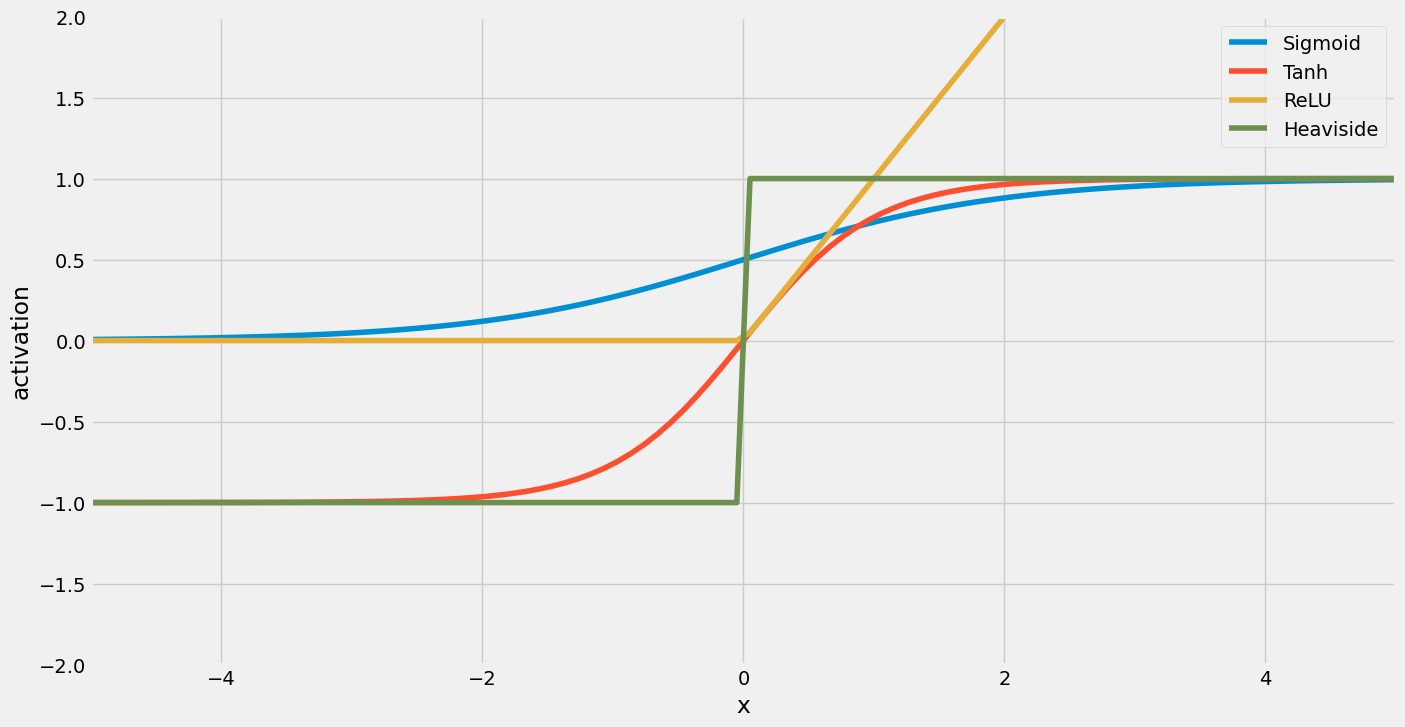

In [19]:
sigmoid = lambda x: 1./(1. + np.exp(-x))
tanh = lambda x: (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
relu = lambda x: np.where(x > 0, x, 0)
heaviside = lambda x: np.where(x < 0, -1, 1)

x = np.linspace(-5,5,100)
plt.figure(figsize=(15,8))
plt.plot(x,sigmoid(x),label="Sigmoid")
plt.plot(x,tanh(x),label="Tanh")
plt.plot(x,relu(x),label="ReLU")
plt.plot(x,heaviside(x),label="Heaviside")
plt.xlabel("x"); plt.ylabel("activation")
plt.legend()
plt.xlim(-5,5); plt.ylim(-2,2);

# Pausa